# Kaggle Competition: House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
## Part 1: Exploratory Data Analysis and Preliminary Results

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('train.csv',index_col = 'Id',na_filter=True)
print(df.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [3]:
print(df.shape)
print(df.info())

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd    

In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As the dataset is maintained and provided by Kaggle, the na_filter parameter is set to False, as 'NA' does not actually indicate a missing values, but is a category by itself. As a unique identifier of each observation, the 'Id' column was made the index column.

The dataset appears to be of cross-sectional nature. It contains 80 features with 1460 observations. Given that the aforementioned assumption is correct, there is no missing data. The dataset includes 37 numerical and 43 categorical variables.

The problem at hand is a regression problem.

In [5]:
# Prepare iterator for feature analysis
categorical_features = iter([col for col in df if df[col].dtype=='object'])
numerical_features = iter([col for col in df if df[col].dtype!='object'])

In [6]:
def num_analysis(subject,target='SalePrice',dataframe=df,reg_order=1,kill_outliers=False,joint_plottype='kde'):
    
    # Relationship between subject variable and target variable
    plt.subplot(1,2,1)
    sns.regplot(x=subject,y=target,data=dataframe,order=reg_order)
    plt.title(target+' vs. '+subject)
    if kill_outliers:
        plt.xlim(max(dataframe[subject].min(),dataframe[subject].mean()-dataframe[subject].std()*3),dataframe[subject].mean()+dataframe[subject].std()*3)
    
    # Distribution of subject variabel
    plt.subplot(1,2,2)
    sns.distplot(dataframe[subject].dropna())
    plt.title('Distribution of '+subject)
    if kill_outliers:
        plt.xlim(max(dataframe[subject].min(),dataframe[subject].mean()-dataframe[subject].std()*3),dataframe[subject].mean()+dataframe[subject].std()*3)
    
    # Joint distribution of target and subject variable
    sns.jointplot(x=subject,y=target,data=dataframe,kind=joint_plottype)
    plt.title('Joint distribution of {} and {}'.format(target,subject))
    
    
    # Numerical correlation between target and subject
    correlation = dataframe.loc[:,[target,subject]].corr().iloc[0,1]
    strenght = None
    if abs(correlation) >= 0.9:
        strenght = 'Very strong'
    elif abs(correlation) >= 0.75:
        strenght = 'Strong'
    elif abs(correlation) >= 0.25:
        strenght = 'Mediocre'
    elif abs(correlation) >= 0.1:
        strenght = 'Weak'
    else:
        strenght = 'Insignificant'
    
    print('Linear correlation between {} and {}: {} ({})'.format(target,subject,correlation, strenght))

Linear correlation between SalePrice and MSSubClass: -0.08428413512659523 (Insignificant)


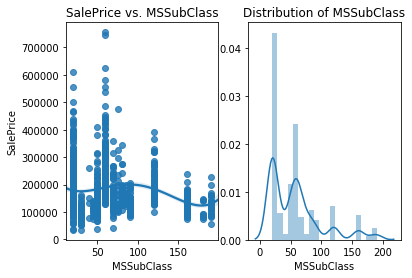

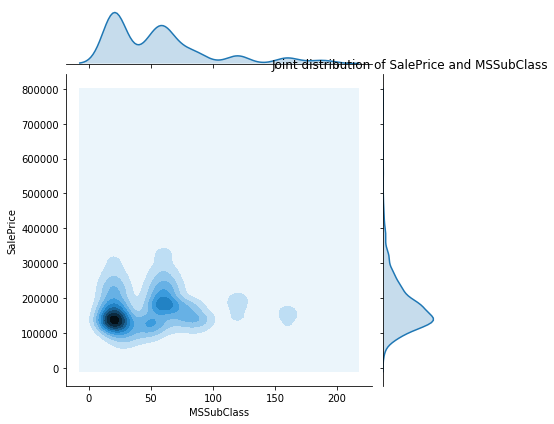

In [7]:
num_analysis(next(numerical_features),reg_order=4)
# Discrete variable, non-linear correlation; 3rd or 4th degree; non-normal

Linear correlation between SalePrice and LotFrontage: 0.35179909657067854 (Mediocre)


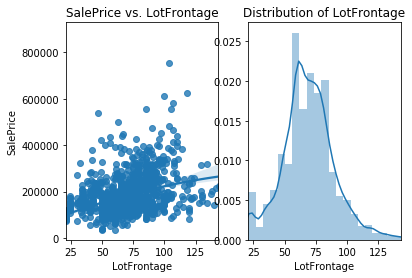

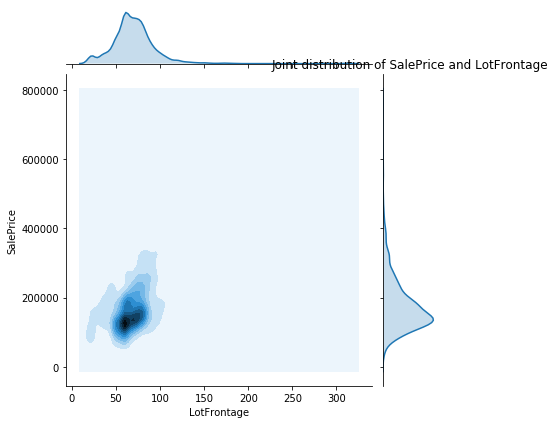

In [8]:
num_analysis(next(numerical_features),reg_order=2,kill_outliers=True)
# Continous variable; mediocre linear correlation to target, non-normal

Linear correlation between SalePrice and LotArea: 0.2638433538714063 (Mediocre)


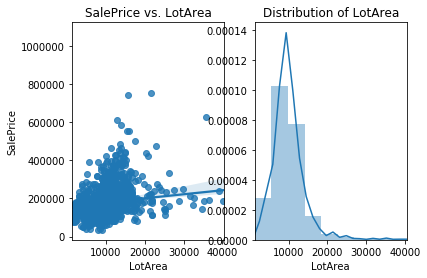

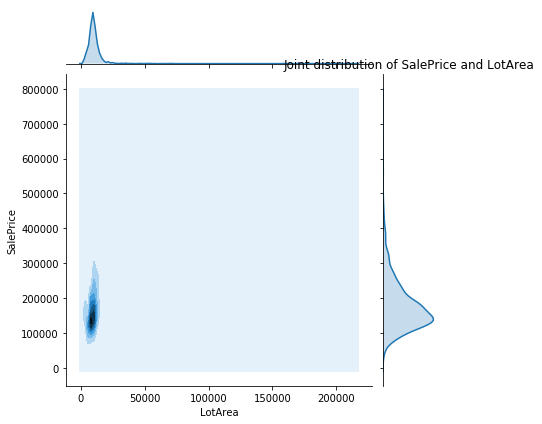

In [9]:
num_analysis(next(numerical_features),kill_outliers=True)
# Continous variable; mediocre linear correlation

Linear correlation between SalePrice and OverallQual: 0.7909816005838047 (Strong)


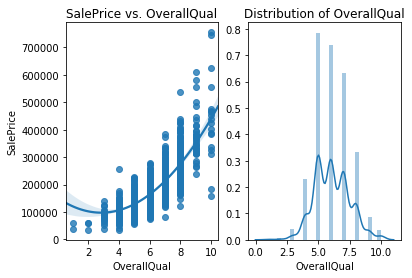

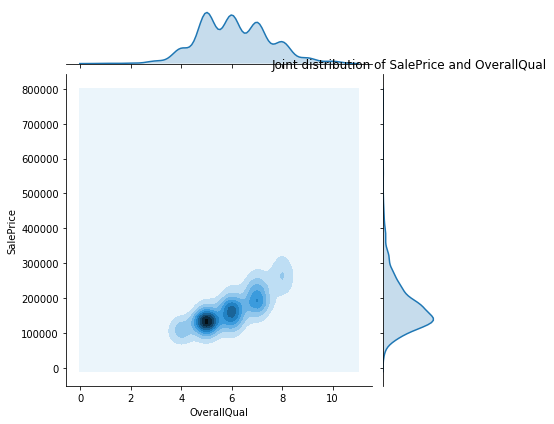

In [10]:
num_analysis(next(numerical_features),reg_order=2)
# Visible quadratic relationship; discrete variable

Linear correlation between SalePrice and OverallCond: -0.0778558940486776 (Insignificant)


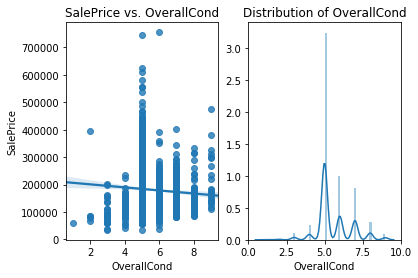

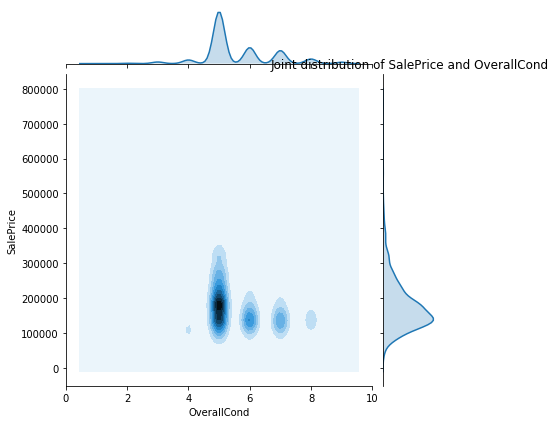

In [11]:
num_analysis(next(numerical_features),reg_order=1)
# discrete variable; insignificant linear relationship; strong imbalance

Linear correlation between SalePrice and YearBuilt: 0.5228973328794967 (Mediocre)


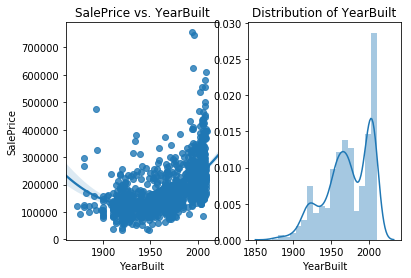

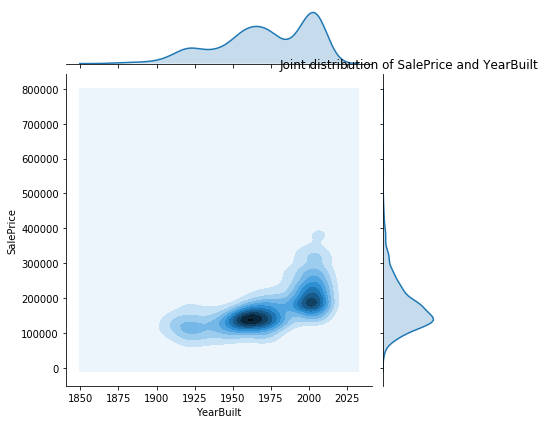

In [12]:
num_analysis(next(numerical_features),reg_order=2)
# visible quadratic relationship; non-normal; notable correlation

Linear correlation between SalePrice and YearRemodAdd: 0.5071009671113867 (Mediocre)


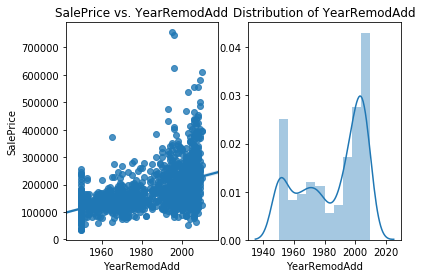

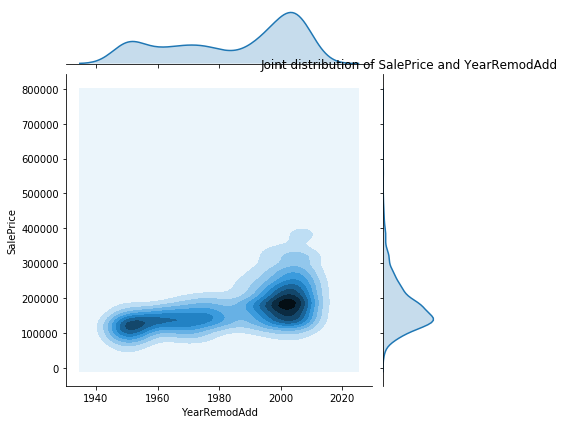

In [13]:
num_analysis(next(numerical_features))
# continous variable; notable correlation, non-normal

Linear correlation between SalePrice and MasVnrArea: 0.4774930470957107 (Mediocre)


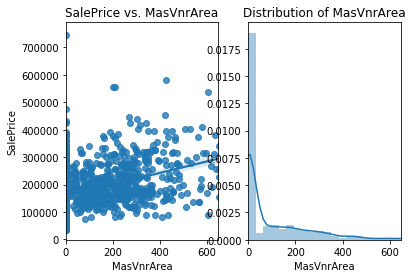

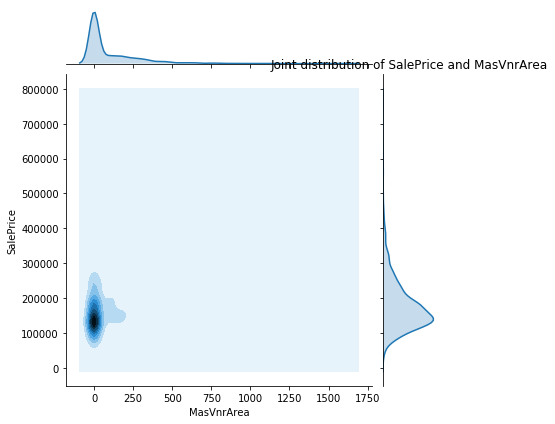

In [14]:
num_analysis(next(numerical_features),kill_outliers=True)
# notable linear relationship, non-normal, heavily imbalanced

Linear correlation between SalePrice and BsmtFinSF1: 0.38641980624215627 (Mediocre)


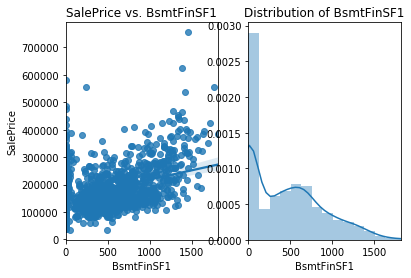

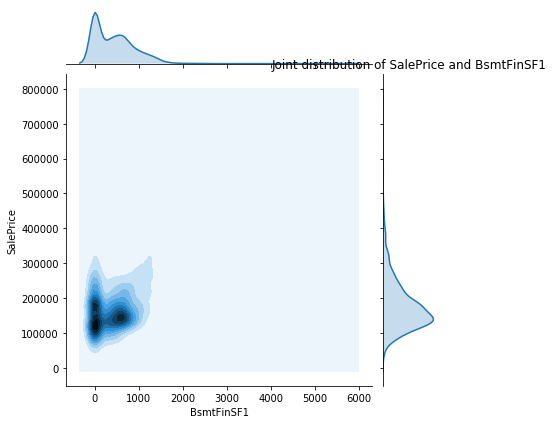

In [15]:
num_analysis(next(numerical_features),kill_outliers=True)
# notable linear relationship, non-normal

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  

Linear correlation between SalePrice and BsmtFinSF2: -0.011378121450215216 (Insignificant)


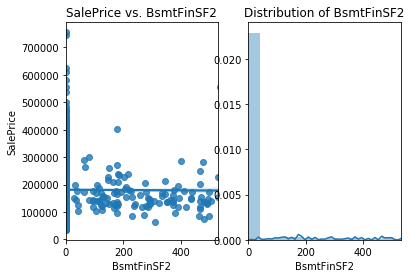

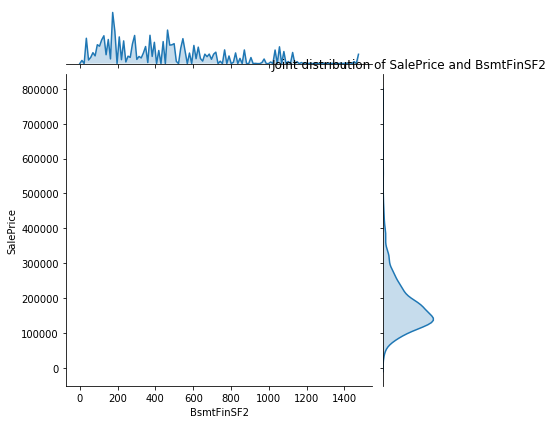

In [16]:
num_analysis(next(numerical_features),kill_outliers=True)

Linear correlation between SalePrice and BsmtUnfSF: 0.214479105546969 (Weak)


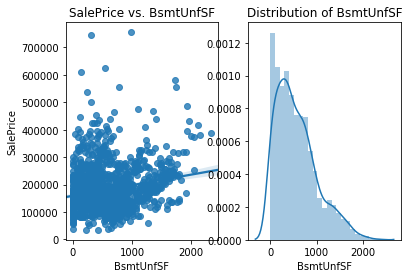

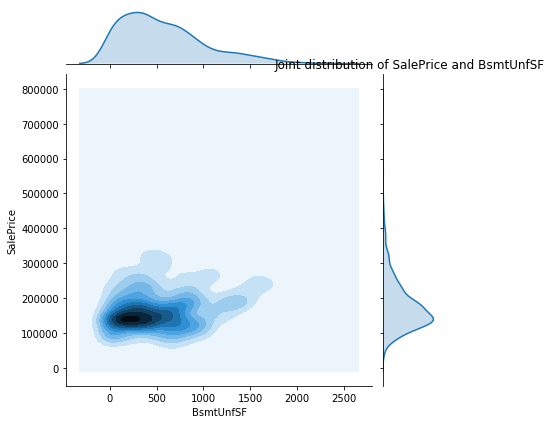

In [17]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and TotalBsmtSF: 0.6135805515591944 (Mediocre)


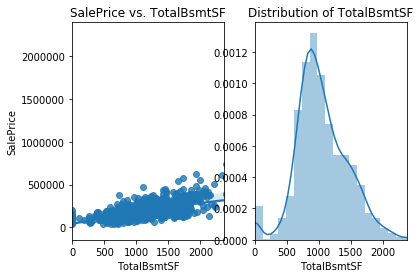

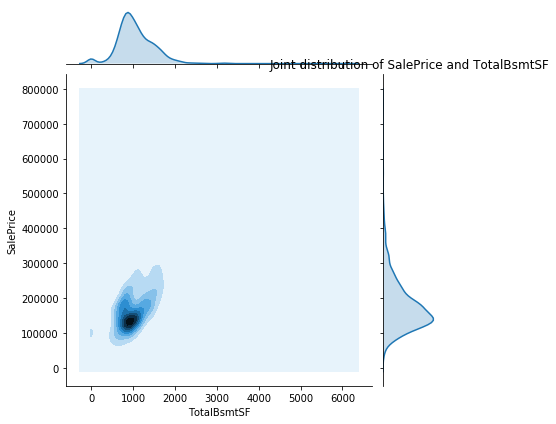

In [18]:
num_analysis(next(numerical_features),kill_outliers=True,reg_order=2)

Linear correlation between SalePrice and 1stFlrSF: 0.6058521846919166 (Mediocre)


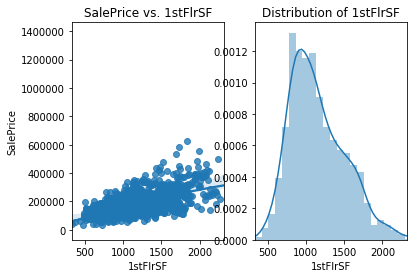

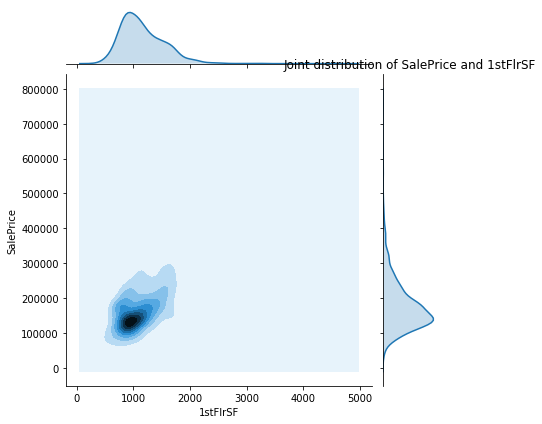

In [19]:
num_analysis(next(numerical_features),kill_outliers=True,reg_order=2)

Linear correlation between SalePrice and 2ndFlrSF: 0.31933380283206614 (Mediocre)


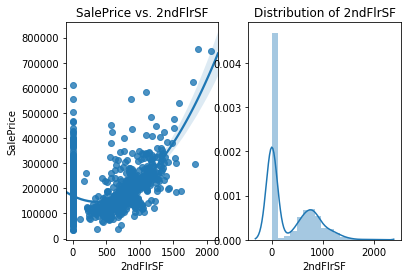

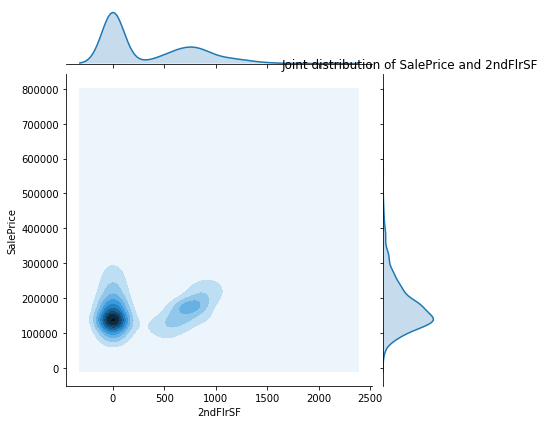

In [20]:
num_analysis(next(numerical_features),reg_order=2)

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and LowQualFinSF: -0.02560613000068015 (Insignificant)


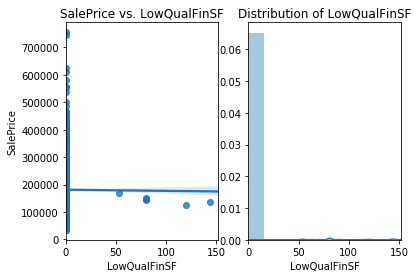

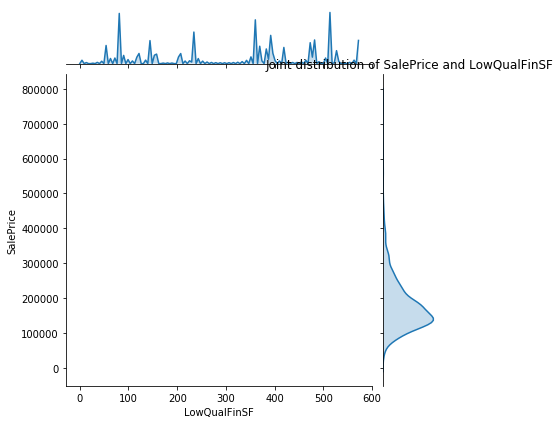

In [21]:
num_analysis(next(numerical_features),kill_outliers=True)

Linear correlation between SalePrice and GrLivArea: 0.7086244776126511 (Mediocre)


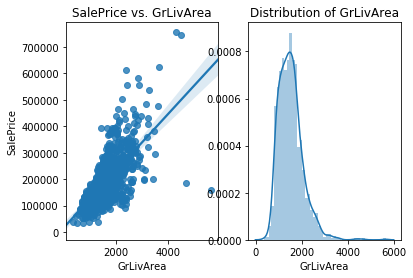

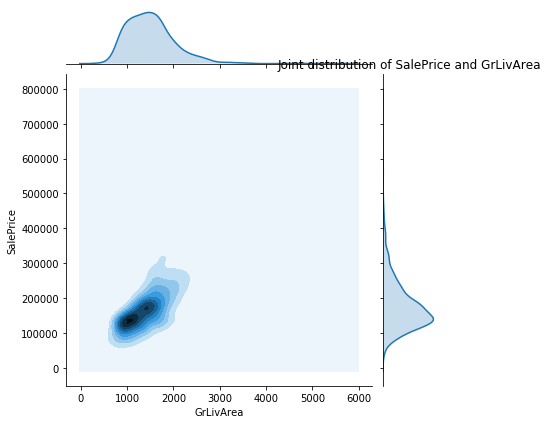

In [22]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and BsmtFullBath: 0.22712223313149718 (Weak)


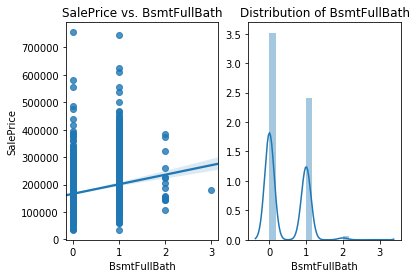

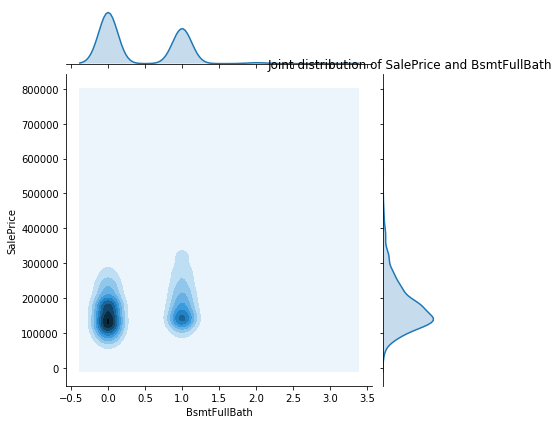

In [23]:
num_analysis(next(numerical_features))

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and BsmtHalfBath: -0.016844154297359294 (Insignificant)


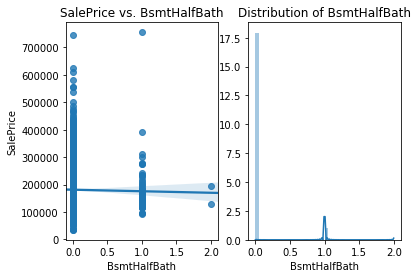

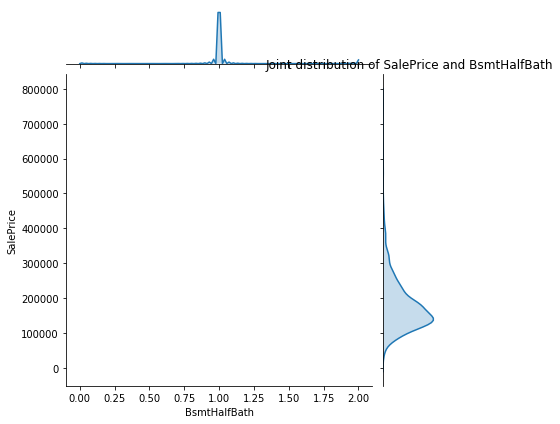

In [24]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and FullBath: 0.5606637627484452 (Mediocre)


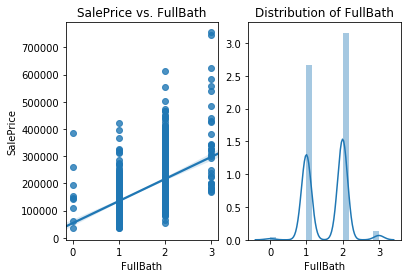

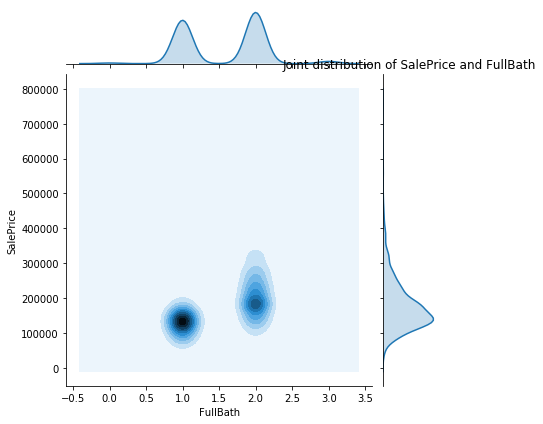

In [25]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and HalfBath: 0.2841076755947784 (Mediocre)


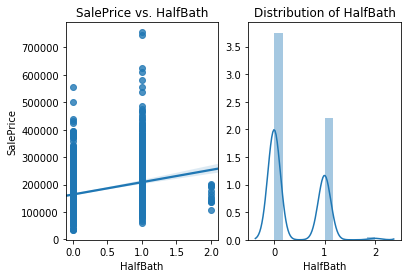

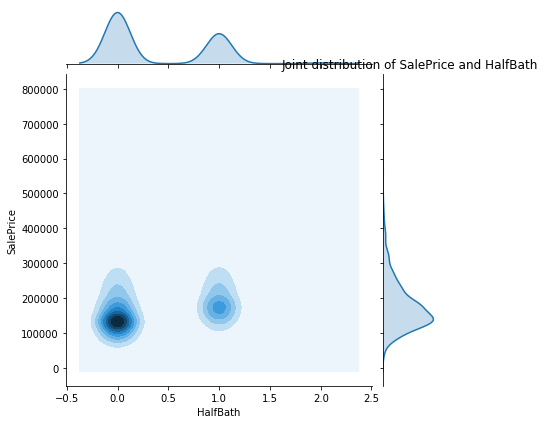

In [26]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and BedroomAbvGr: 0.1682131543007415 (Weak)


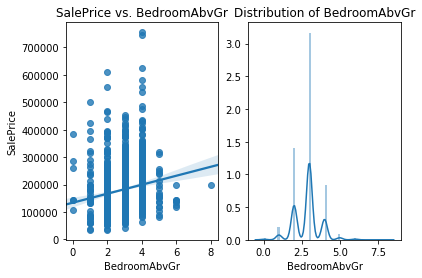

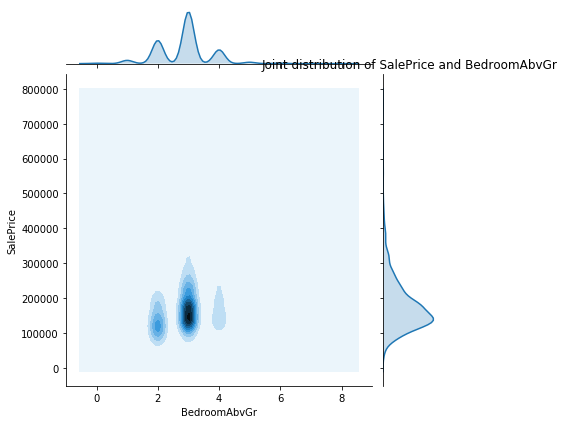

In [27]:
num_analysis(next(numerical_features))

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and KitchenAbvGr: -0.1359073708421417 (Weak)


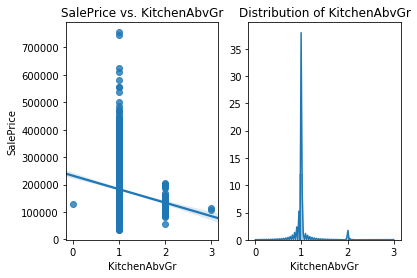

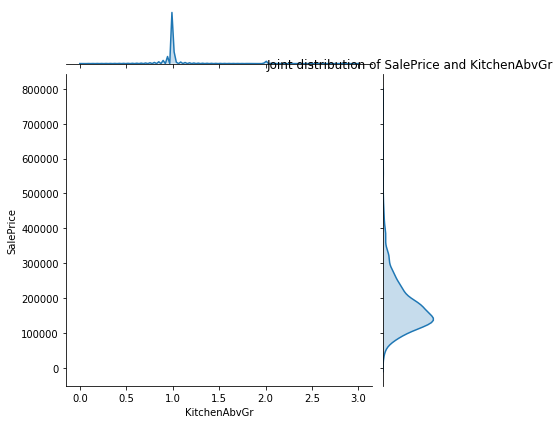

In [28]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and TotRmsAbvGrd: 0.5337231555820238 (Mediocre)


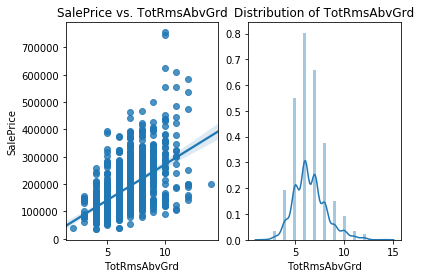

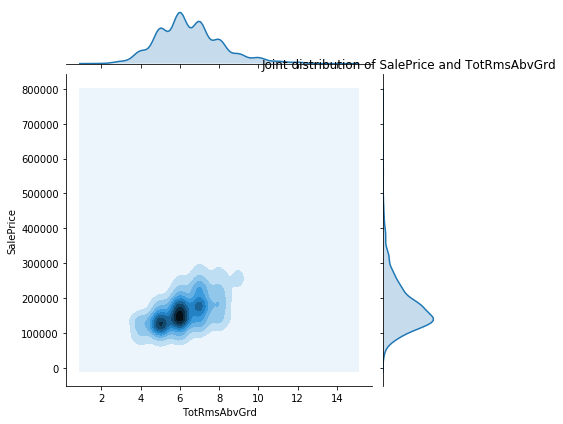

In [29]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and Fireplaces: 0.4669288367515242 (Mediocre)


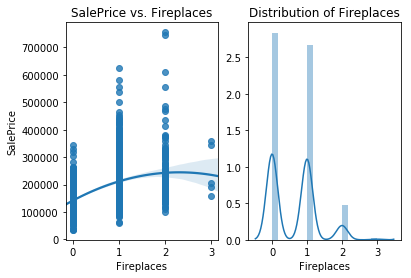

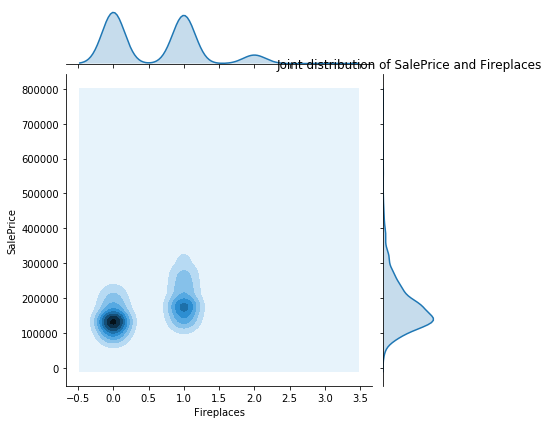

In [30]:
num_analysis(next(numerical_features),reg_order=2)

Linear correlation between SalePrice and GarageYrBlt: 0.48636167748786213 (Mediocre)


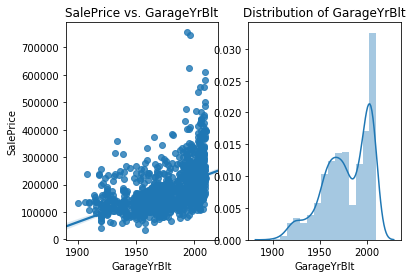

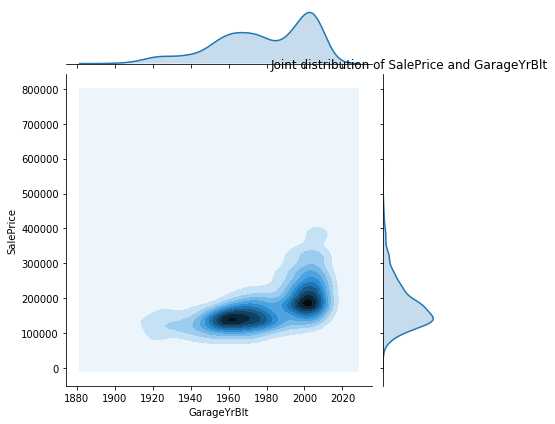

In [31]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and GarageCars: 0.640409197258349 (Mediocre)


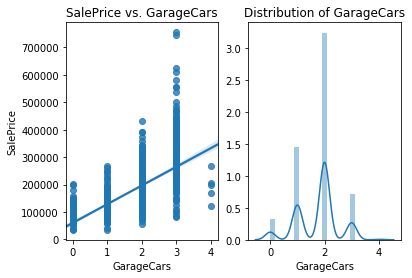

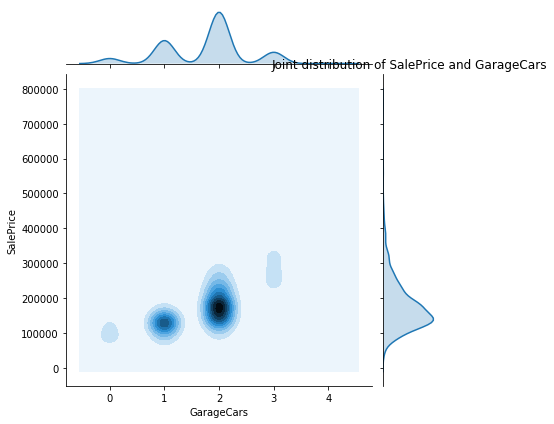

In [32]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and GarageArea: 0.6234314389183598 (Mediocre)


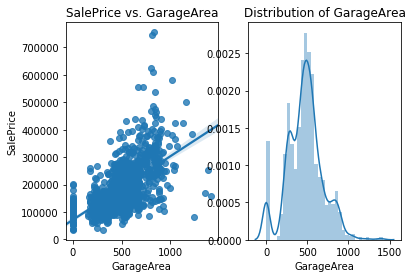

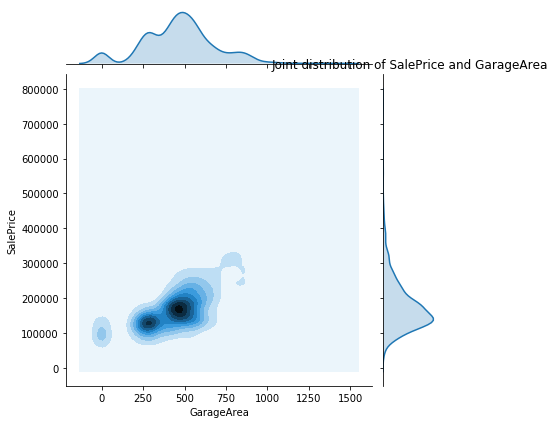

In [33]:
num_analysis(next(numerical_features))

Linear correlation between SalePrice and WoodDeckSF: 0.32441344456813076 (Mediocre)


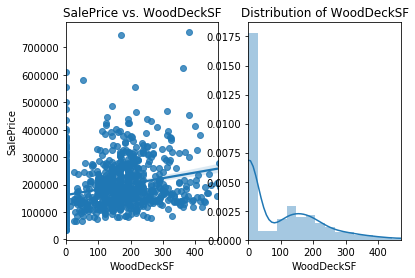

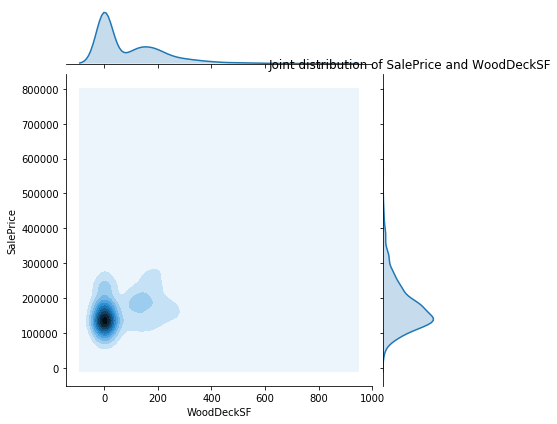

In [34]:
num_analysis(next(numerical_features),kill_outliers=True)

Linear correlation between SalePrice and OpenPorchSF: 0.31585622711605577 (Mediocre)


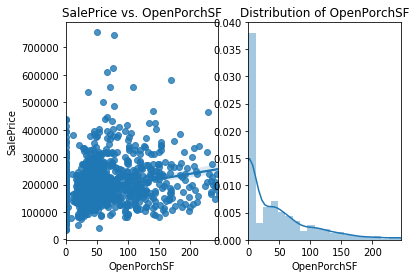

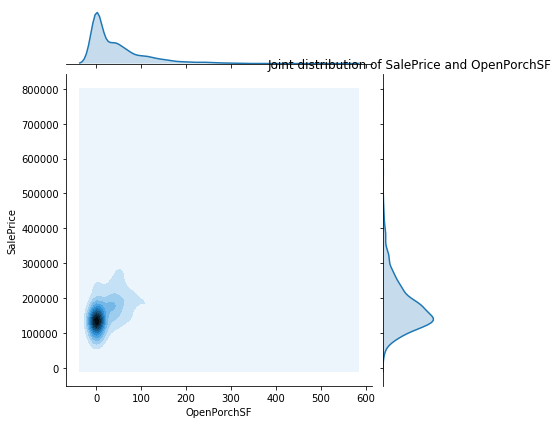

In [35]:
num_analysis(next(numerical_features),kill_outliers=True)

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and EnclosedPorch: -0.12857795792595636 (Weak)


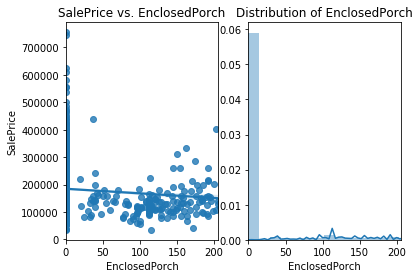

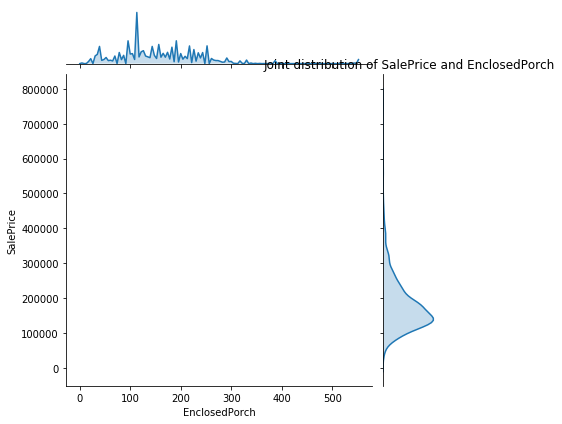

In [36]:
num_analysis(next(numerical_features),kill_outliers=True)

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and 3SsnPorch: 0.04458366533574792 (Insignificant)


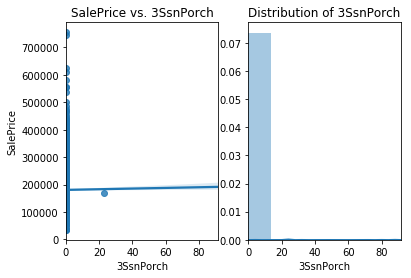

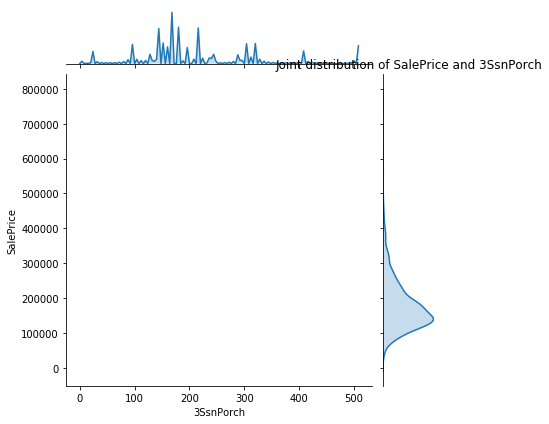

In [37]:
num_analysis(next(numerical_features),kill_outliers=True)

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and ScreenPorch: 0.11144657114291048 (Weak)


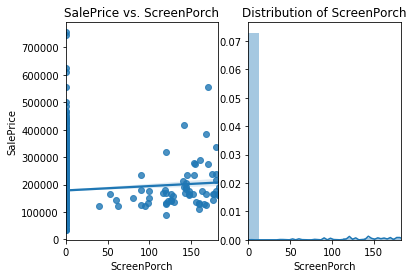

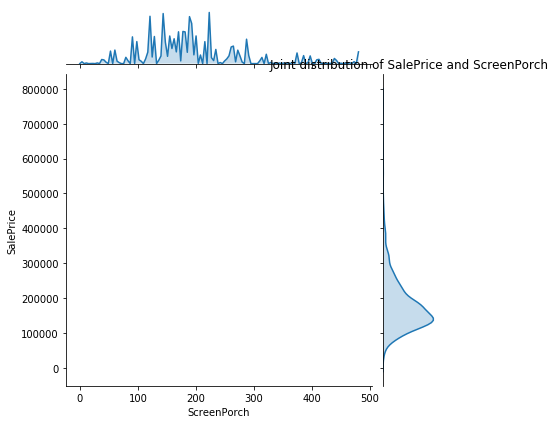

In [38]:
num_analysis(next(numerical_features),kill_outliers=True)

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and PoolArea: 0.09240354949187278 (Insignificant)


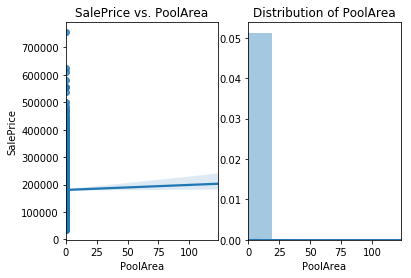

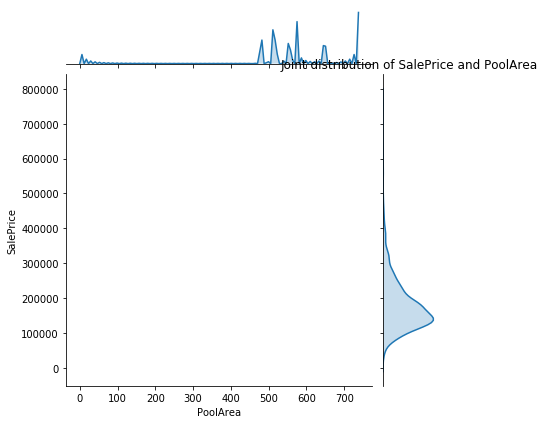

In [39]:
num_analysis(next(numerical_features),kill_outliers=True)

C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Marco\Anaconda3\envs\mlTraining\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Linear correlation between SalePrice and MiscVal: -0.02118957964030379 (Insignificant)


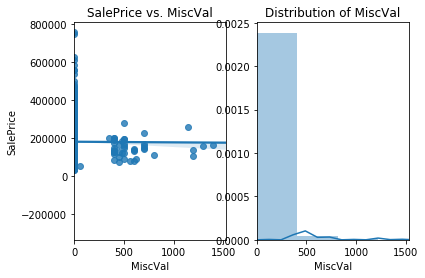

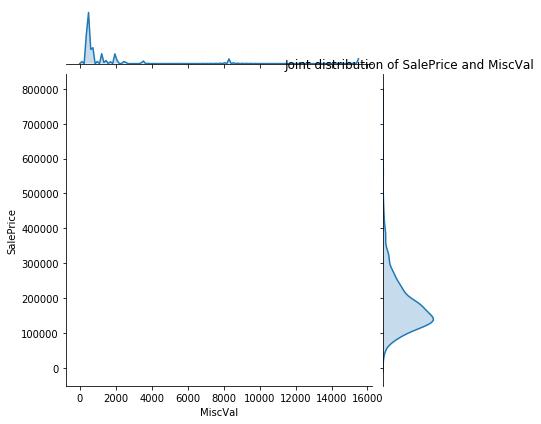

In [40]:
num_analysis(next(numerical_features),kill_outliers=True)

Linear correlation between SalePrice and MoSold: 0.04643224522381936 (Insignificant)


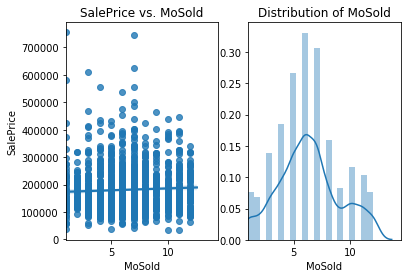

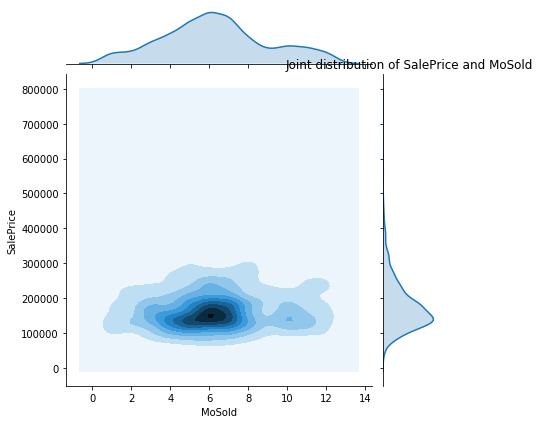

In [41]:
num_analysis(next(numerical_features),kill_outliers=True)

Linear correlation between SalePrice and YrSold: -0.028922585168730426 (Insignificant)


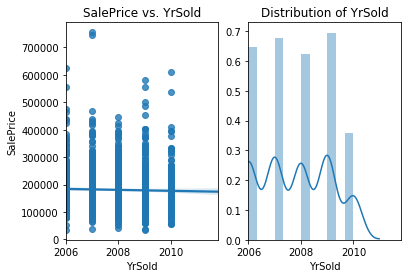

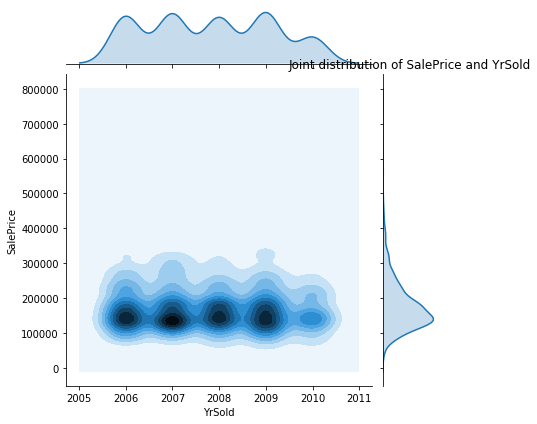

In [42]:
num_analysis(next(numerical_features),kill_outliers=True)

Linear correlation between SalePrice and SalePrice: 1.0 (Very strong)


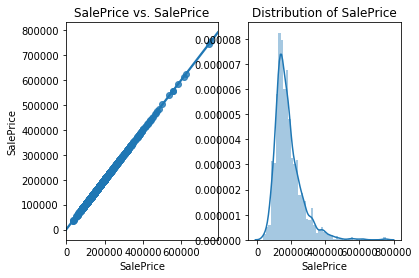

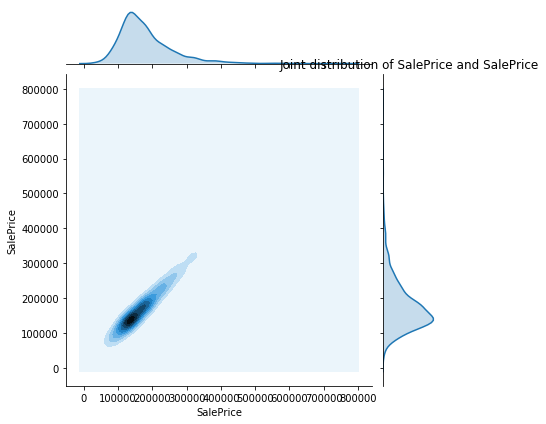

In [43]:
num_analysis(next(numerical_features))

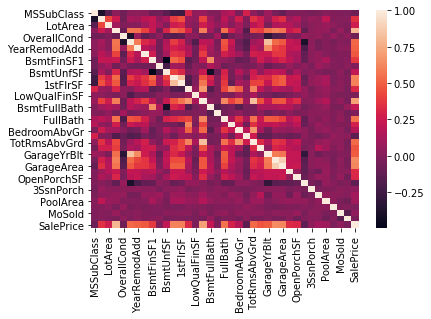

In [44]:
sns.heatmap(df.corr())

#### Preliminary Analysis of Numerical Features:
Mostly no relationship to a higher degree than 2. Numerical features will be needing normalization and scaling. The correlation heatmap does not suggest excessive multicollinearity, which is why, there will be no need for dimensionality reduction. However, to avoid excessively high dimensionality, there will be polynomial dimensionality reduction performed first, and then linear dimensionality reduction.

In [45]:
def cat_analysis(subject,target='SalePrice',dataframe=df):
    plt.subplot(1,2,1)
    sns.boxplot(x=subject,y=target,data=dataframe)
    plt.subplot(1,2,2)
    sns.countplot(dataframe[subject])

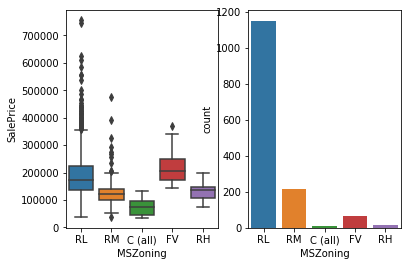

In [46]:
cat_analysis(next(categorical_features))

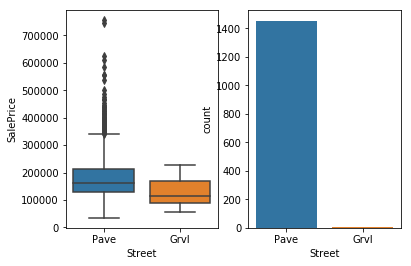

In [47]:
cat_analysis(next(categorical_features))

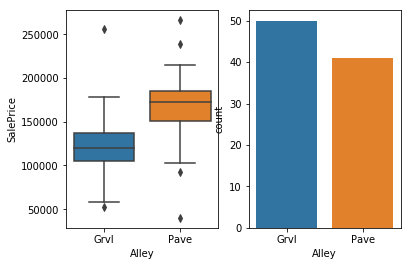

In [48]:
cat_analysis(next(categorical_features))

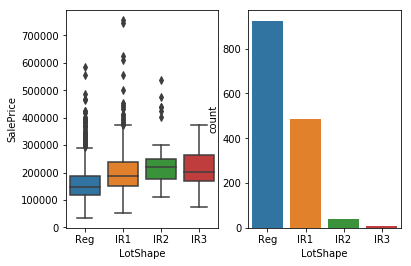

In [49]:
cat_analysis(next(categorical_features))

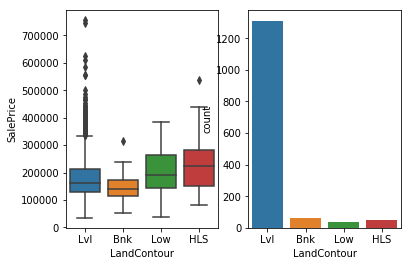

In [50]:
cat_analysis(next(categorical_features))

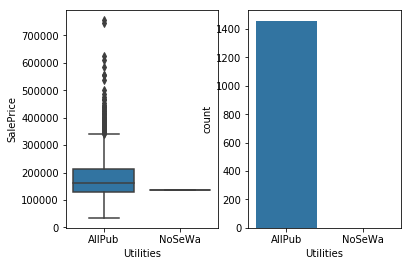

In [51]:
cat_analysis(next(categorical_features))

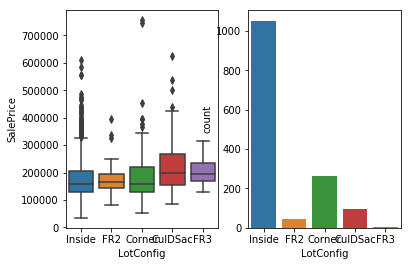

In [52]:
cat_analysis(next(categorical_features))

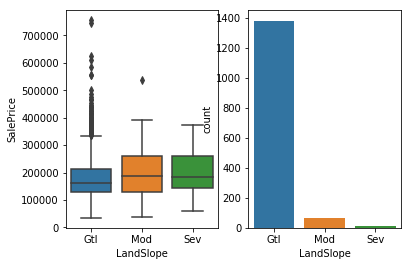

In [53]:
cat_analysis(next(categorical_features))

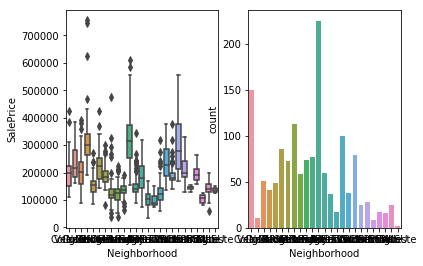

In [54]:
cat_analysis(next(categorical_features))

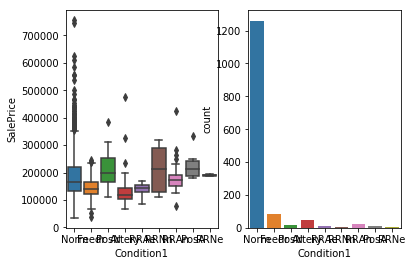

In [55]:
cat_analysis(next(categorical_features))

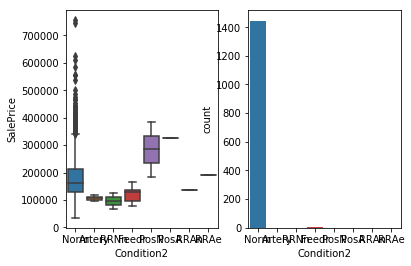

In [56]:
cat_analysis(next(categorical_features))

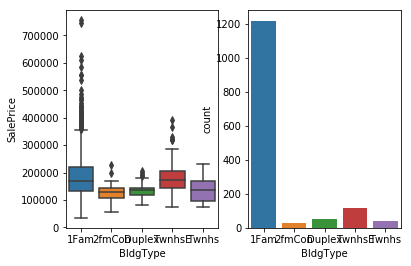

In [57]:
cat_analysis(next(categorical_features))

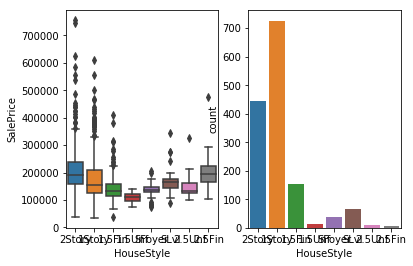

In [58]:
cat_analysis(next(categorical_features))

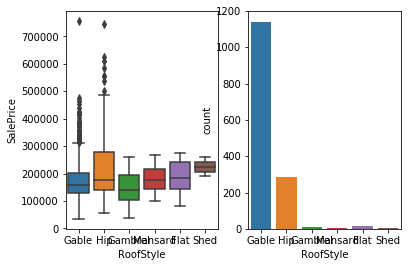

In [59]:
cat_analysis(next(categorical_features))

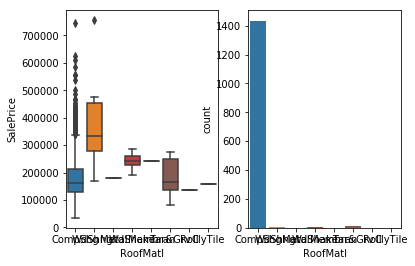

In [60]:
cat_analysis(next(categorical_features))

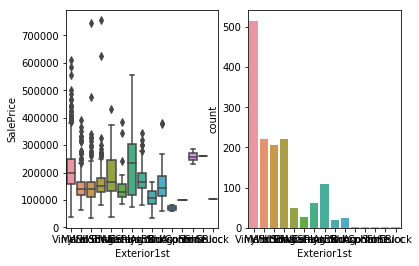

In [61]:
cat_analysis(next(categorical_features))

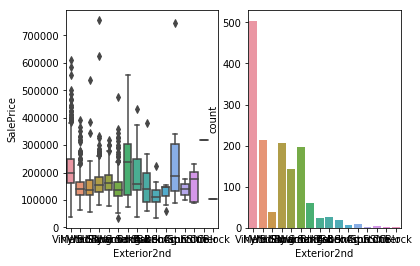

In [62]:
cat_analysis(next(categorical_features))

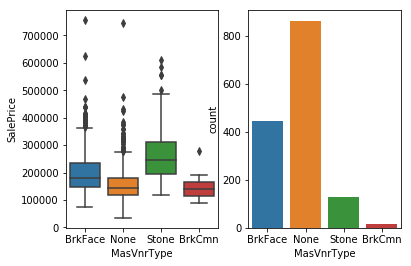

In [63]:
cat_analysis(next(categorical_features))

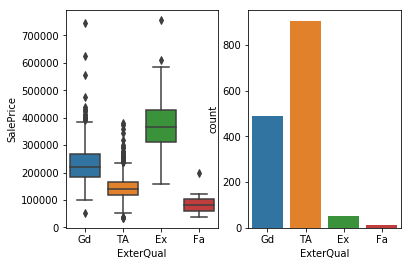

In [64]:
cat_analysis(next(categorical_features))

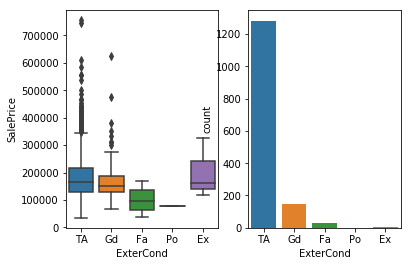

In [65]:
cat_analysis(next(categorical_features))

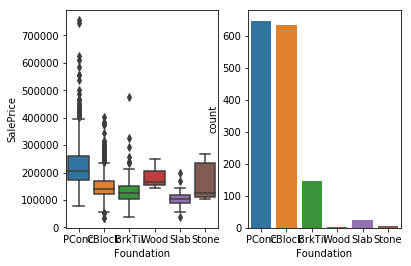

In [66]:
cat_analysis(next(categorical_features))

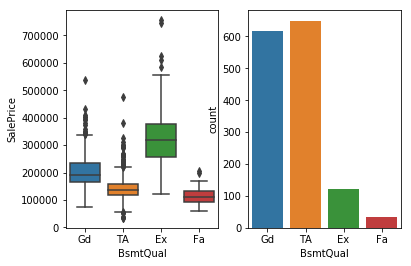

In [67]:
cat_analysis(next(categorical_features))

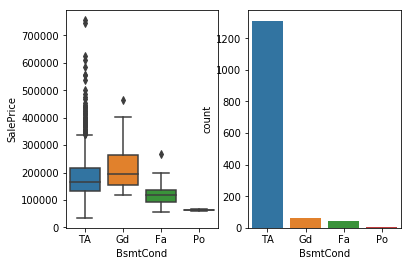

In [68]:
cat_analysis(next(categorical_features))

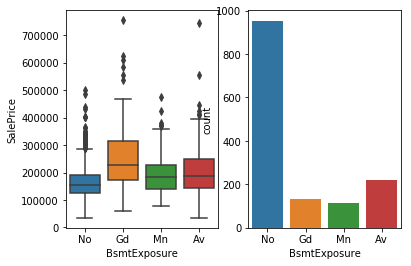

In [69]:
cat_analysis(next(categorical_features))

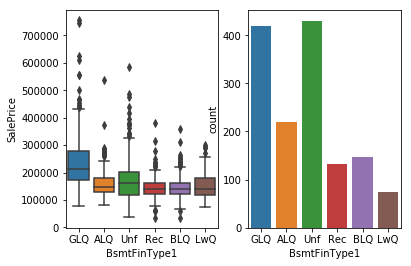

In [70]:
cat_analysis(next(categorical_features))

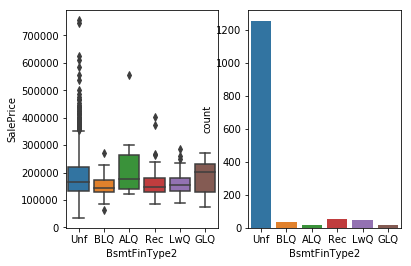

In [71]:
cat_analysis(next(categorical_features))

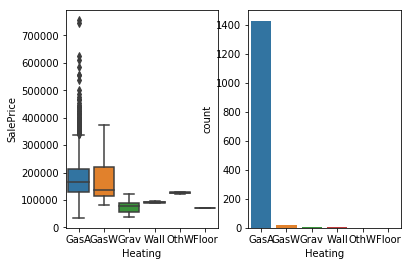

In [72]:
cat_analysis(next(categorical_features))

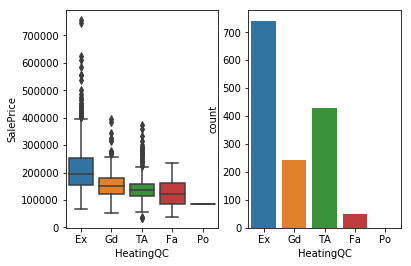

In [73]:
cat_analysis(next(categorical_features))

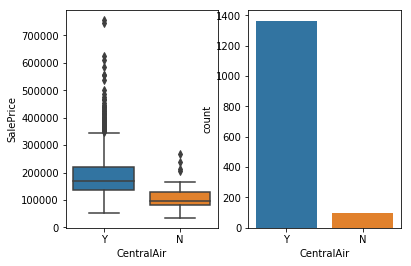

In [74]:
cat_analysis(next(categorical_features))

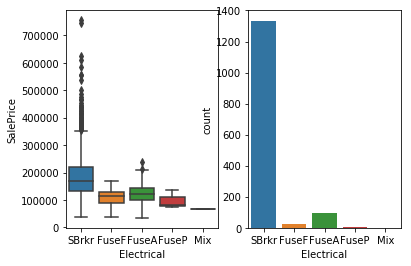

In [75]:
cat_analysis(next(categorical_features))

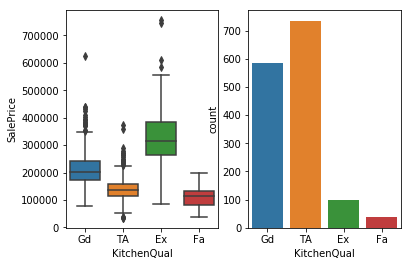

In [76]:
cat_analysis(next(categorical_features))

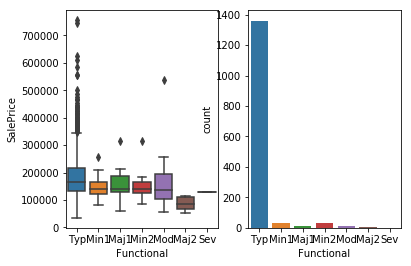

In [77]:
cat_analysis(next(categorical_features))

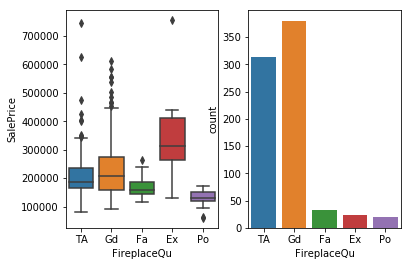

In [78]:
cat_analysis(next(categorical_features))

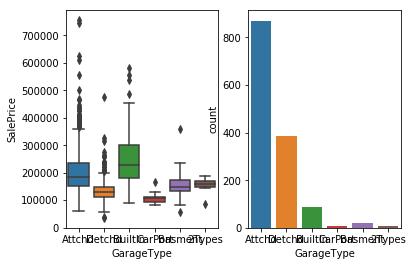

In [79]:
cat_analysis(next(categorical_features))

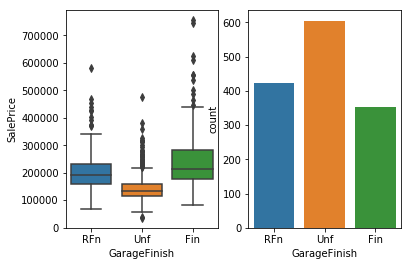

In [80]:
cat_analysis(next(categorical_features))

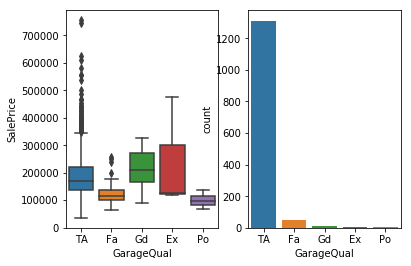

In [81]:
cat_analysis(next(categorical_features))

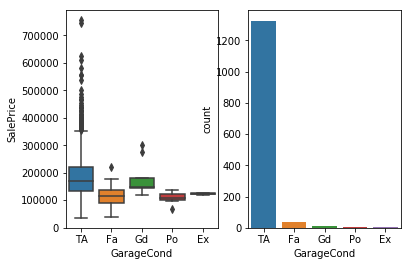

In [82]:
cat_analysis(next(categorical_features))

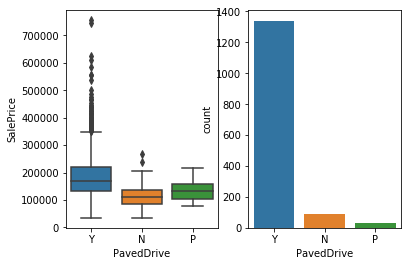

In [83]:
cat_analysis(next(categorical_features))

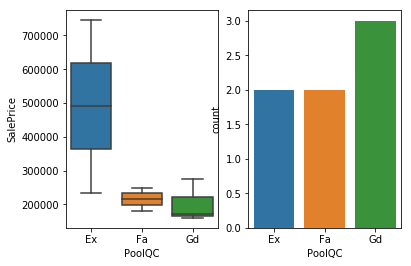

In [84]:
cat_analysis(next(categorical_features))

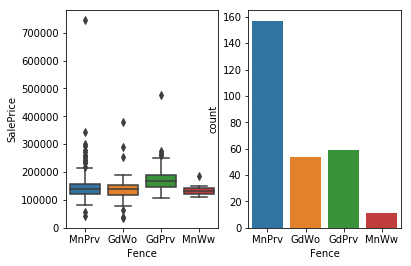

In [85]:
cat_analysis(next(categorical_features))

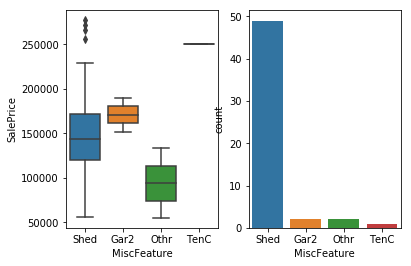

In [86]:
cat_analysis(next(categorical_features))

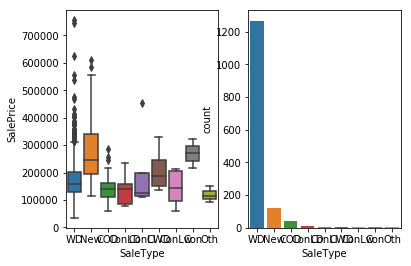

In [87]:
cat_analysis(next(categorical_features))

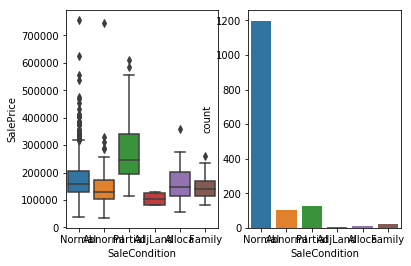

In [88]:
cat_analysis(next(categorical_features))

#### Preliminary analysis of categorical features
The preliminary analysis has revealed several features, which either heavily imbalanced or offer little to no information on the target. This finding further encourages the use of dimensionality reduction.

### Conclusion
The preliminary investigation of the given features has revealed the need for the following transformational steps (in order):
1. Normalization
2. Standard Scaling
3. t-SNE dimensionality reduction
4. linear dimensionality reduction?